# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings
warnings.filterwarnings("ignore")

In [261]:
# 한글 및 특정 문자 깨짐 문제 해결
import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만, - 깨짐 해결

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
# plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic' # 'batang'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# matplotlib.rcParams['axes.unicode_minus'] = False

In [132]:
df = pd.read_csv('C:/workspace/wassup3/05_Data_Analysis/data/mini.csv')

In [133]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [11]:
df.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [12]:
df.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [140]:
df_obj = df.drop(columns=['user_id','preferred_difficulty_level','subscription_type'])
df_obj

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,2,0,1


In [14]:
df.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [114]:
df.payment_pattern

0       5
1       6
2       7
3       0
4       0
       ..
9995    1
9996    7
9997    6
9998    0
9999    3
Name: payment_pattern, Length: 10000, dtype: int64

In [115]:
#결제패턴에 따른 구독지속여부 카운트 
df1 = df.groupby('payment_pattern')['target'].value_counts()

In [58]:
pymt = df[['payment_pattern','subscription_duration', 'average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','community_engagement_level']]
pymt

,payment_pattern,subscription_duration,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level
0,5,13,8.427187,18,16,68.360455,4
1,6,16,72.646087,16,13,97.567322,3
2,7,22,21.774492,13,14,94.358763,4
3,0,1,42.659066,19,18,70.153228,3
4,0,4,30.744287,19,10,81.917908,4
...,...,...,...,...,...,...,...
9995,1,22,84.053558,18,16,64.966803,5
9996,7,10,45.464833,9,8,82.750244,3
9997,6,7,127.302411,24,14,81.567839,5
9998,0,11,5.297234,10,10,89.885656,5


In [117]:
pymt1 = df.set_index('payment_pattern')
pymt1

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,target
payment_pattern,,,,,,,,,,,,,,
5,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,0
6,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,1
7,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,1
0,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,1
0,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1
7,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,1
6,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,1


In [233]:
comm = df.set_index('community_engagement_level')
comm['target'].value_counts()

target
1    6199
0    3801
Name: count, dtype: int64

In [193]:
df1['total']=pymt1.groupby(pymt1.index)[['target']].count()
df1['target_0'] = df1['total']-df1['target_1']
df1

,target_1,target_0,total
payment_pattern,,,
0,807,468,1275
1,783,502,1285
2,747,459,1206
3,763,467,1230
4,753,461,1214
5,750,488,1238
6,801,467,1268
7,795,489,1284


In [205]:
comm=df[['community_engagement_level','target','subscription_duration', 'average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement']]
comm

,community_engagement_level,target,subscription_duration,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement
0,4,0,13,8.427187,18,16,68.360455
1,3,1,16,72.646087,16,13,97.567322
2,4,1,22,21.774492,13,14,94.358763
3,3,1,1,42.659066,19,18,70.153228
4,4,1,4,30.744287,19,10,81.917908
...,...,...,...,...,...,...,...
9995,5,1,22,84.053558,18,16,64.966803
9996,3,1,10,45.464833,9,8,82.750244
9997,5,1,7,127.302411,24,14,81.567839
9998,5,1,11,5.297234,10,10,89.885656


In [207]:
comm.set_index('community_engagement_level')

,target,subscription_duration,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement
community_engagement_level,,,,,,
4,0,13,8.427187,18,16,68.360455
3,1,16,72.646087,16,13,97.567322
4,1,22,21.774492,13,14,94.358763
3,1,1,42.659066,19,18,70.153228
4,1,4,30.744287,19,10,81.917908
...,...,...,...,...,...,...
5,1,22,84.053558,18,16,64.966803
3,1,10,45.464833,9,8,82.750244
5,1,7,127.302411,24,14,81.567839


In [216]:
df_comm = comm.groupby(comm.index)['target'].sum()
df_comm

0       0
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: target, Length: 10000, dtype: int64

(60.0, 65.0)

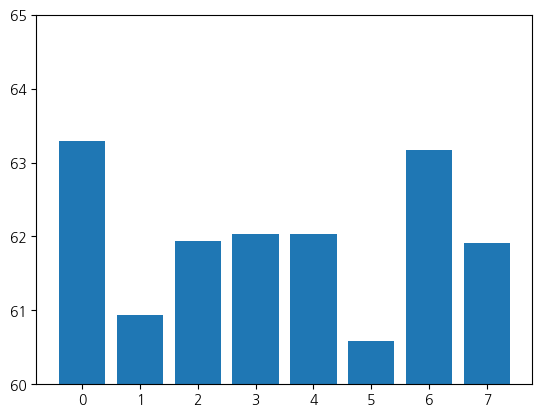

In [120]:
plt.bar(df1.index, df1['구독비율'])
plt.ylim(60,65)

In [207]:
df2 = pymt1.groupby(pymt1.index)[['recent_learning_achievement']].describe().round(2)
df2

recent_learning_achievement                              \
                                      count   mean    std    min    25%   
payment_pattern                                                           
0                                    1275.0  74.89   9.70  44.36  68.01   
1                                    1285.0  75.13   9.77  45.36  68.69   
2                                    1206.0  75.63  10.30  35.94  68.41   
3                                    1230.0  74.59  10.05  43.73  67.65   
4                                    1214.0  75.03  10.02  41.75  68.66   
5                                    1238.0  75.09  10.21  36.12  68.30   
6                                    1268.0  74.92   9.88  36.83  68.32   
7                                    1284.0  74.99   9.82  43.07  68.45   

                                       
                   50%    75%     max  
payment_pattern                        
0                75.16  81.43  106.39  
1                75.25  81.54  100.85  
2                75.76  82.15  112.64  
3                74.84  81.33  106.94  
4                74.77  81.75  105.32  
5                75.24  82.27  105.39  
6                75.05  81.50  107.14  
7                74.92  81.53  105.07

In [52]:
pymt_counts = df.groupby('payment_pattern')['user_id'].count()
pymt_counts

payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: user_id, dtype: int64

<BarContainer object of 8 artists>

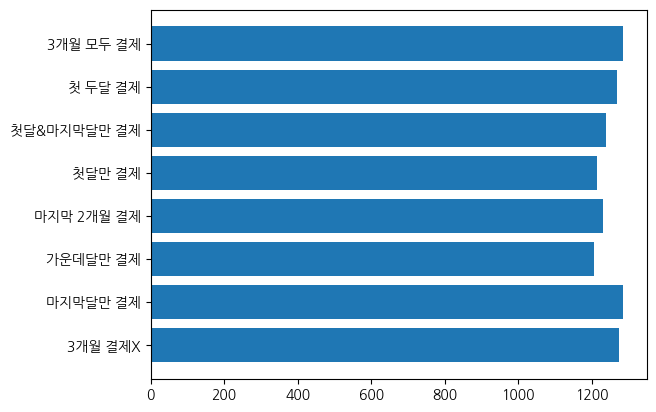

In [54]:
#payment_pattern 그래프
x = ['3개월 결제X' , '마지막달만 결제', '가운데달만 결제', '마지막 2개월 결제', '첫달만 결제','첫달&마지막달만 결제','첫 두달 결제','3개월 모두 결제']
plt.barh(x, pymt_counts.values)

In [6]:
#target count
target_counts = df.groupby('target')['user_id'].count()
target_counts

target
0    3801
1    6199
Name: user_id, dtype: int64

<BarContainer object of 2 artists>

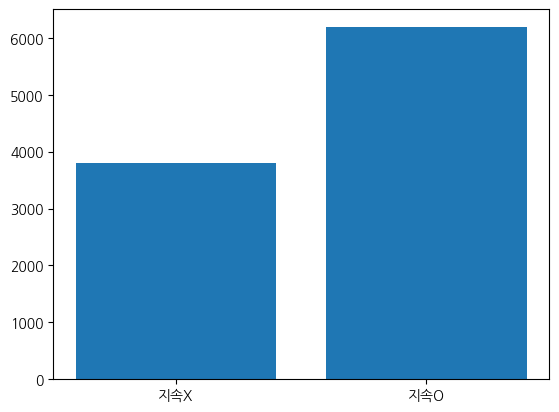

In [7]:
#target 그래프
x = ['지속X' , '지속O']
plt.bar(x, target_counts.values)

In [8]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [9]:
df.groupby('target')['user_id'].count()

target
0    3801
1    6199
Name: user_id, dtype: int64

In [31]:
df2 = df.groupby('target').describe()
df2

subscription_duration                                                   \
                       count       mean       std  min  25%   50%   75%   max   
target                                                                          
0                     3801.0  11.953959  6.618295  1.0  6.0  12.0  18.0  23.0   
1                     6199.0  11.862720  6.590500  1.0  6.0  12.0  18.0  23.0   

       recent_login_time             ... customer_inquiry_history        \
                   count       mean  ...                      75%   max   
target                               ...                                  
0                 3801.0  15.057880  ...                      3.0  10.0   
1                 6199.0  14.985804  ...                      3.0   8.0   

       payment_pattern                                               
                 count      mean       std  min  25%  50%  75%  max  
target                                                               
0               3801.0  3.506972  2.302291  0.0  1.0  4.0  6.0  7.0  
1               6199.0  3.500403  2.316925  0.0  1.0  3.0  6.0  7.0  

[2 rows x 88 columns]

In [35]:
df3=df[df['target'] == 1].describe()
df3.T

,count,mean,std,min,25%,50%,75%,max
subscription_duration,6199.0,11.862720,6.590500,1.000000,6.000000,12.000000,18.000000,23.000000
recent_login_time,6199.0,14.985804,8.322310,1.000000,8.000000,15.000000,22.000000,29.000000
average_login_time,6199.0,14.974035,3.029275,2.366189,12.976618,14.979217,16.964874,26.284396
average_time_per_learning_session,6199.0,60.105533,63.477523,0.013535,15.908562,39.705116,80.159683,503.372616
monthly_active_learning_days,6199.0,12.571866,6.980077,1.000000,7.000000,12.000000,19.000000,24.000000
total_completed_courses,6199.0,12.216003,3.636558,2.000000,10.000000,12.000000,15.000000,27.000000
recent_learning_achievement,6199.0,75.047419,10.027058,36.115562,68.249866,75.199591,81.867694,112.643828
abandoned_learning_sessions,6199.0,3.016616,1.754416,0.000000,2.000000,3.000000,4.000000,12.000000
community_engagement_level,6199.0,3.895628,1.264061,1.000000,3.000000,4.000000,5.000000,5.000000
customer_inquiry_history,6199.0,2.010808,1.428306,0.000000,1.000000,2.000000,3.000000,8.000000


In [36]:
df4=df[df['target'] == 0].describe()
df4.T

,count,mean,std,min,25%,50%,75%,max
subscription_duration,3801.0,11.953959,6.618295,1.000000,6.000000,12.000000,18.000000,23.000000
recent_login_time,3801.0,15.057880,8.428730,1.000000,8.000000,15.000000,22.000000,29.000000
average_login_time,3801.0,15.026762,2.956732,3.636424,13.077376,14.979239,17.030607,26.998490
average_time_per_learning_session,3801.0,46.456986,39.639733,0.011515,14.485582,34.773346,68.298309,179.176060
monthly_active_learning_days,3801.0,12.502236,6.854200,1.000000,7.000000,13.000000,18.000000,24.000000
total_completed_courses,3801.0,12.246251,3.630554,1.000000,10.000000,12.000000,15.000000,27.000000
recent_learning_achievement,3801.0,75.000310,9.873574,35.941755,68.316764,74.981448,81.520614,107.135153
abandoned_learning_sessions,3801.0,3.087609,1.755430,0.000000,2.000000,3.000000,4.000000,11.000000
community_engagement_level,3801.0,3.870560,1.259105,1.000000,3.000000,4.000000,5.000000,5.000000
customer_inquiry_history,3801.0,2.009997,1.409145,0.000000,1.000000,2.000000,3.000000,10.000000


In [62]:
df3_4 = pd.concat([df3.T['mean'],df4.T['mean']],axis=1)
#df1.rename(columns={'target': '구독O'}, inplace=True)
df3_4.columns=['1_mean', '0_mean']
df3_4

,1_mean,0_mean
subscription_duration,11.862720,11.953959
recent_login_time,14.985804,15.057880
average_login_time,14.974035,15.026762
average_time_per_learning_session,60.105533,46.456986
monthly_active_learning_days,12.571866,12.502236
total_completed_courses,12.216003,12.246251
recent_learning_achievement,75.047419,75.000310
abandoned_learning_sessions,3.016616,3.087609
community_engagement_level,3.895628,3.870560
customer_inquiry_history,2.010808,2.009997


In [68]:
df_tar_learn = df.groupby(['target'])[['average_time_per_learning_session']]
df_tar_learn

In [ ]:
sns.catplot(
    data=df, kind="bar",
    x="species", y="body_mass_g", hue="target",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

Text(0.5, 1.0, 'target vs 학습평균시간')

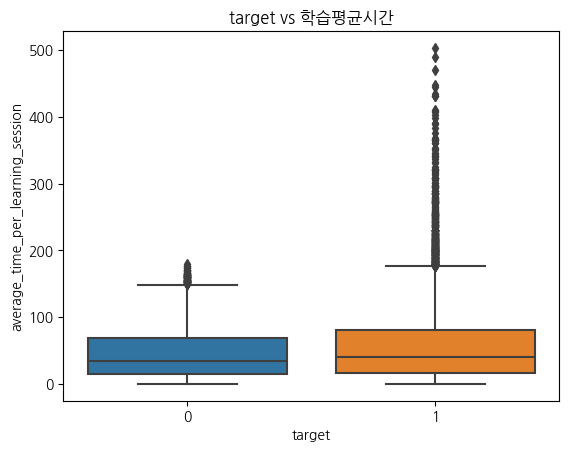

In [98]:
sns.boxplot(data=df, x="target", y="average_time_per_learning_session")
plt.title('target vs 학습평균시간')

In [312]:
sns.eventplot(data=df, x="subscription_duration", y='total_completed_courses', hue='target')
plt.title('target에 따른 공부시간과 성취도의 상관관계')

AttributeError: module 'seaborn' has no attribute 'eventplot'

In [315]:
sns.displot?

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

<Axes: xlabel='target,preferred_difficulty_level'>

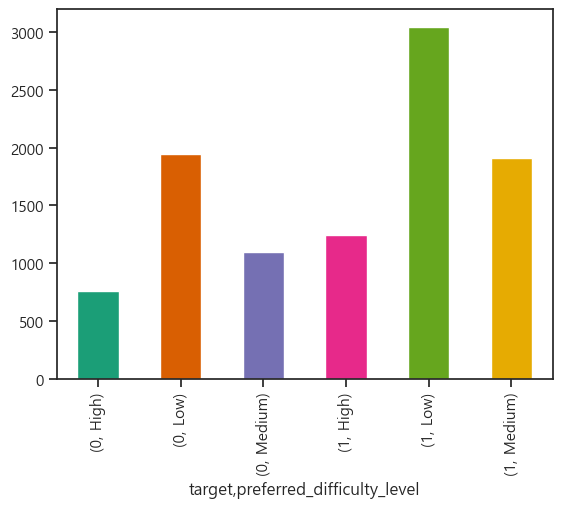

In [299]:
df.groupby(['target','preferred_difficulty_level']).size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

In [244]:
df.groupby('target')['average_time_per_learning_session'].describe().T

target,0,1
count,3801.000000,6199.000000
mean,46.456986,60.105533
std,39.639733,63.477523
min,0.011515,0.013535
25%,14.485582,15.908562
50%,34.773346,39.705116
75%,68.298309,80.159683
max,179.176060,503.372616


In [246]:
df.groupby('target')['recent_learning_achievement'].describe().T

target,0,1
count,3801.000000,6199.000000
mean,75.000310,75.047419
std,9.873574,10.027058
min,35.941755,36.115562
25%,68.316764,68.249866
50%,74.981448,75.199591
75%,81.520614,81.867694
max,107.135153,112.643828


In [20]:
df2.to_excel('data/target.xlsx')

In [11]:
target_df = df[['target','subscription_duration','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','community_engagement_level']]
target_df.set_index('target')

,subscription_duration,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level
target,,,,,,
0,13,8.427187,18,16,68.360455,4
1,16,72.646087,16,13,97.567322,3
1,22,21.774492,13,14,94.358763,4
1,1,42.659066,19,18,70.153228,3
1,4,30.744287,19,10,81.917908,4
...,...,...,...,...,...,...
1,22,84.053558,18,16,64.966803,5
1,10,45.464833,9,8,82.750244,3
1,7,127.302411,24,14,81.567839,5


In [195]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [200]:
df.groupby('community_engagement_level')[['target']].count()

,target
community_engagement_level,
1,559
2,1219
3,1588
4,2070
5,4564
